In [1]:
# model architecture

# Input

# Conv1D
# BatchNorm
# Activation
# Dropout

# GRU
# Dropout
# BatchNorm

# GRU
# Dropout
# BatchNorm
# Dropout

# Dense
# TimeDistributed

In [2]:
# idea for how to split audio
# go through all of the y_preds
# if prediction is above a certain threshold and theres been ~70 of those predictions in a row you can cut the audio
# reason for 70 predictions in a row is that after the trigger word is said model will output a bunch of high probability values 
# that the trigger word has just been said and we want to cut the audio only once. 

In [3]:
import IPython
import numpy as np
import tensorflow as tf
import matplotlib as plt

from td_utils import *
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import Model, load_model, Sequential
from keras.layers import GRU, Bidirectional, BatchNormalization, Reshape
from keras.layers import Dense, Activation, Dropout, Input, Masking, TimeDistributed, LSTM, Conv1D

/home/nik/anaconda3/envs/tensorflowenv/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [4]:
# load data (data was preprocessed with data_prep notebook and uploaded to gdrive)
X_train = np.load("X_train.npy")
Y_train = np.load("Y_train.npy")

In [5]:
X_train.shape, Y_train.shape

((1291, 5998, 101), (1291, 1496))

In [6]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [7]:
t_x = 5998
number_of_frequencies = 101

In [8]:
input_x = Input(shape=(t_x, number_of_frequencies))

X = Conv1D(filters=196, kernel_size=15, strides=4)(input_x)
X = BatchNormalization()(X)
X = Activation("relu")(X)
X = Dropout(rate=0.8)(X)

X = GRU(units=128, return_sequences=True)(X)
X = Dropout(rate=0.8)(X)
X = BatchNormalization()(X)

X = GRU(units=128, return_sequences=True)(X)
X = Dropout(rate=0.8)(X)
X = BatchNormalization()(X)
X = Dropout(rate=0.8)(X)

X = TimeDistributed(Dense(1, activation="sigmoid"))(X)

model = Model(inputs=input_x, outputs=X)

In [9]:
#optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, decay=0.01)
optimizer = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, decay=0.01)

In [10]:
#model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy", f1_m])
#model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy"])
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy", f1_score])

In [11]:
X_train.shape

(1291, 5998, 101)

In [12]:
Y_train.shape

(1291, 1496)

In [13]:
Y_train.shape

(1291, 1496)

In [14]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5998, 101)]       0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1496, 196)         297136    
_________________________________________________________________
batch_normalization (BatchNo (None, 1496, 196)         784       
_________________________________________________________________
activation (Activation)      (None, 1496, 196)         0         
_________________________________________________________________
dropout (Dropout)            (None, 1496, 196)         0         
_________________________________________________________________
gru (GRU)                    (None, 1496, 128)         125184    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1496, 128)        

In [17]:
model.fit(X_train, Y_train, batch_size=12, epochs=150)

Epoch 1/150
108/108 [==============================] - 10s 92ms/step - loss: 0.3688 - accuracy: 0.8780 - f1_score: 0.0240
Epoch 2/150
108/108 [==============================] - 10s 92ms/step - loss: 0.2541 - accuracy: 0.9260 - f1_score: 0.0496
Epoch 3/150
108/108 [==============================] - 10s 92ms/step - loss: 0.1534 - accuracy: 0.9426 - f1_score: 0.5246
Epoch 4/150
108/108 [==============================] - 10s 93ms/step - loss: 0.1422 - accuracy: 0.9493 - f1_score: 0.5880
Epoch 5/150
108/108 [==============================] - 10s 92ms/step - loss: 0.1176 - accuracy: 0.9560 - f1_score: 0.6607
Epoch 6/150
108/108 [==============================] - 10s 91ms/step - loss: 0.1015 - accuracy: 0.9618 - f1_score: 0.7116
Epoch 7/150
108/108 [==============================] - 10s 92ms/step - loss: 0.0918 - accuracy: 0.9666 - f1_score: 0.7522
Epoch 8/150
108/108 [==============================] - 10s 92ms/step - loss: 0.0868 - accuracy: 0.9686 - f1_score: 0.7676
Epoch 9/150
108/108 [===

108/108 [==============================] - 10s 92ms/step - loss: 0.0244 - accuracy: 0.9914 - f1_score: 0.9406
Epoch 134/150
108/108 [==============================] - 10s 92ms/step - loss: 0.0253 - accuracy: 0.9911 - f1_score: 0.9379
Epoch 135/150
108/108 [==============================] - 10s 92ms/step - loss: 0.0254 - accuracy: 0.9912 - f1_score: 0.9377
Epoch 136/150
108/108 [==============================] - 10s 93ms/step - loss: 0.0245 - accuracy: 0.9914 - f1_score: 0.9401
Epoch 137/150
108/108 [==============================] - 10s 92ms/step - loss: 0.0254 - accuracy: 0.9913 - f1_score: 0.9393
Epoch 138/150
108/108 [==============================] - 10s 92ms/step - loss: 0.0236 - accuracy: 0.9915 - f1_score: 0.9416
Epoch 139/150
108/108 [==============================] - 10s 92ms/step - loss: 0.0246 - accuracy: 0.9913 - f1_score: 0.9400
Epoch 140/150
108/108 [==============================] - 10s 92ms/step - loss: 0.0257 - accuracy: 0.9909 - f1_score: 0.9377
Epoch 141/150
108/108 

In [25]:
model.save('saved_model/v2_1') 

INFO:tensorflow:Assets written to: saved_model/v2_1/assets


In [15]:
model = tf.keras.models.load_model('saved_model/v2_1', custom_objects={'f1_score': f1_score})

In [16]:
def _detect_trigger_word(filename):
    plt.subplot(2, 1, 1)
    
    x_test = graph_spectrogram(filename)
    x_test = x_test.swapaxes(0,1)
    x_test = np.expand_dims(x_test, axis=0)
    
    predictions = model.predict(x_test)
    
    plt.subplot(2,1,2)
    plt.plot(predictions[0, :, 0])
    plt.ylabel('probability')
    plt.show()
    return predictions

In [35]:
silent_audio = AudioSegment.silent(duration=10000)
background = AudioSegment.from_wav("dev_1.wav")
background = silent_audio.overlay(background)
background.set_frame_rate(44100)
background.export("dev_1.wav", format="wav")

<_io.BufferedRandom name='dev_1.wav'>

In [36]:
IPython.display.Audio("dev_1.wav")

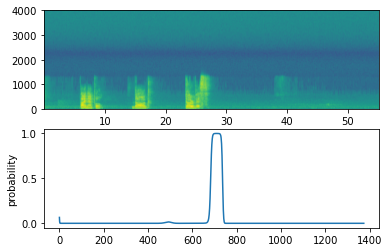

array([[[6.5586865e-02],
        [1.9375548e-02],
        [4.4052964e-03],
        ...,
        [3.7809235e-07],
        [3.7816199e-07],
        [3.7823156e-07]]], dtype=float32)

In [37]:
_detect_trigger_word("dev_1.wav")

In [17]:
silent_audio = AudioSegment.silent(duration=10000)
background = AudioSegment.from_wav("dev_2.wav")
background = silent_audio.overlay(background)
background.set_frame_rate(44100)
background.export("dev_2.wav", format="wav")

<_io.BufferedRandom name='dev_2.wav'>

In [18]:
IPython.display.Audio("dev_2.wav")

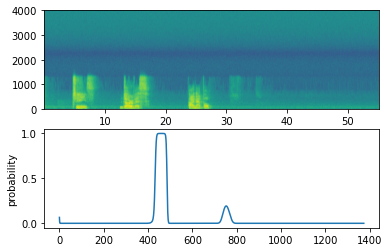

array([[[6.5587096e-02],
        [1.9375712e-02],
        [4.4052005e-03],
        ...,
        [3.7804983e-07],
        [3.7812046e-07],
        [3.7819080e-07]]], dtype=float32)

In [19]:
_detect_trigger_word("dev_2.wav")

In [20]:
silent_audio = AudioSegment.silent(duration=10000)
background = AudioSegment.from_wav("dev_3.wav")
background = silent_audio.overlay(background)
background.set_frame_rate(44100)
background.export("dev_3.wav", format="wav")

<_io.BufferedRandom name='dev_3.wav'>

In [21]:
IPython.display.Audio("dev_3.wav")

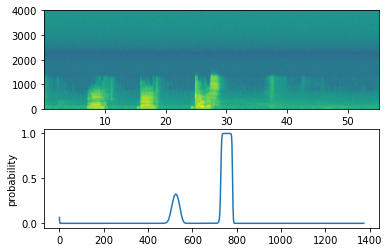

array([[[6.5587386e-02],
        [1.9375937e-02],
        [4.4052755e-03],
        ...,
        [3.7170486e-07],
        [3.7177969e-07],
        [3.7185447e-07]]], dtype=float32)

In [22]:
_detect_trigger_word("dev_3.wav")

In [23]:
silent_audio = AudioSegment.silent(duration=10000)
background = AudioSegment.from_wav("dev_4.wav")
background = silent_audio.overlay(background)
background.set_frame_rate(44100)
background.export("dev_4.wav", format="wav")

<_io.BufferedRandom name='dev_4.wav'>

In [24]:
IPython.display.Audio("dev_4.wav")

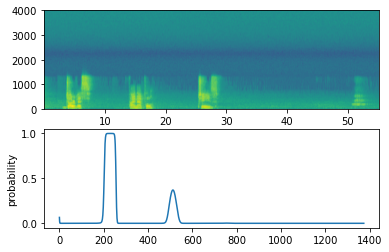

array([[[6.5583676e-02],
        [1.9371962e-02],
        [4.4032643e-03],
        ...,
        [4.0315757e-07],
        [4.0295535e-07],
        [4.0274097e-07]]], dtype=float32)

In [25]:
_detect_trigger_word("dev_4.wav")

In [38]:
silent_audio = AudioSegment.silent(duration=10000)
background = AudioSegment.from_wav("dev_5.wav")
background = silent_audio.overlay(background)
background.set_frame_rate(44100)
background.export("dev_5.wav", format="wav")

<_io.BufferedRandom name='dev_5.wav'>

In [39]:
IPython.display.Audio("dev_5.wav")

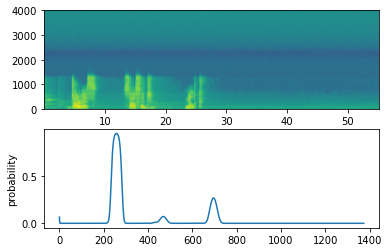

array([[[6.5585636e-02],
        [1.9373683e-02],
        [4.4038934e-03],
        ...,
        [3.8386409e-07],
        [3.8392963e-07],
        [3.8399517e-07]]], dtype=float32)

In [41]:
_detect_trigger_word("dev_5.wav")

In [42]:
silent_audio = AudioSegment.silent(duration=10000)
background = AudioSegment.from_wav("dev_6.wav")
background = silent_audio.overlay(background)
background.set_frame_rate(44100)
background.export("dev_6.wav", format="wav")

<_io.BufferedRandom name='dev_6.wav'>

In [43]:
IPython.display.Audio("dev_6.wav")

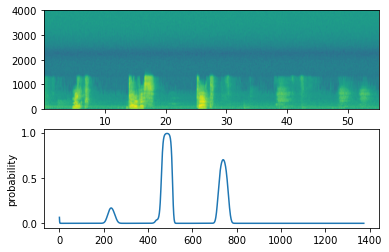

array([[[6.5586954e-02],
        [1.9375548e-02],
        [4.4050957e-03],
        ...,
        [3.8164185e-07],
        [3.8165422e-07],
        [3.8167244e-07]]], dtype=float32)

In [44]:
_detect_trigger_word("dev_6.wav")

In [118]:
X_test = np.load("X_test.npy")
Y_test = np.load("Y_test.npy")

In [92]:
X_train.shape

(1291, 5998, 101)

In [93]:
Y_train.shape

(1291, 1496)

In [98]:
X_test.shape

(3, 5998, 101)

In [112]:
Y_test.shape

(5, 1496)

In [119]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.0578 - accuracy: 0.9860 - f1_score: 0.8050


[0.05777724087238312, 0.9859625697135925, 0.8049535155296326]